<a href="https://colab.research.google.com/github/erickow123/TA_Learning/blob/main/18_Week_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2023-11-22 03:00:48--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.192.207, 209.85.146.207, 209.85.147.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.192.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   181MB/s    in 0.4s    

2023-11-22 03:00:49 (181 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import zipfile

# unzip the archive
local_zip = './cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()

zip_ref.close()

In [ ]:
import os

base_dir = 'cats_and_dogs_filtered/'

print('Contens of base directory: ')
print(os.listdir(base_dir))

print("\nContents of train directory: ")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory: ")
print(os.listdir(f'{base_dir}/validation'))

Contens of base directory: 
['validation', 'vectorize.py', 'train']

Contents of train directory: 
['cats', 'dogs']

Contents of validation directory: 
['cats', 'dogs']


In [ ]:
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# directory with validation
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.655.jpg', 'cat.908.jpg', 'cat.333.jpg', 'cat.625.jpg', 'cat.27.jpg', 'cat.795.jpg', 'cat.435.jpg', 'cat.137.jpg', 'cat.749.jpg', 'cat.226.jpg']
['dog.627.jpg', 'dog.768.jpg', 'dog.55.jpg', 'dog.737.jpg', 'dog.162.jpg', 'dog.116.jpg', 'dog.320.jpg', 'dog.986.jpg', 'dog.911.jpg', 'dog.990.jpg']


In [ ]:
print('total training cat images   :', len(os.listdir(train_cats_dir)))
print('total training dog images   :', len(os.listdir(train_dogs_dir)))

print('total validation cat images :', len(os.listdir(validation_cats_dir)))
print('total validation dog images :', len(os.listdir(validation_dogs_dir)))

total training cat images   : 1000
total training dog images   : 1000
total validation cat images : 500
total validation dog images : 500


In [ ]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

nrows = 4
ncols = 4

pic_index = 0

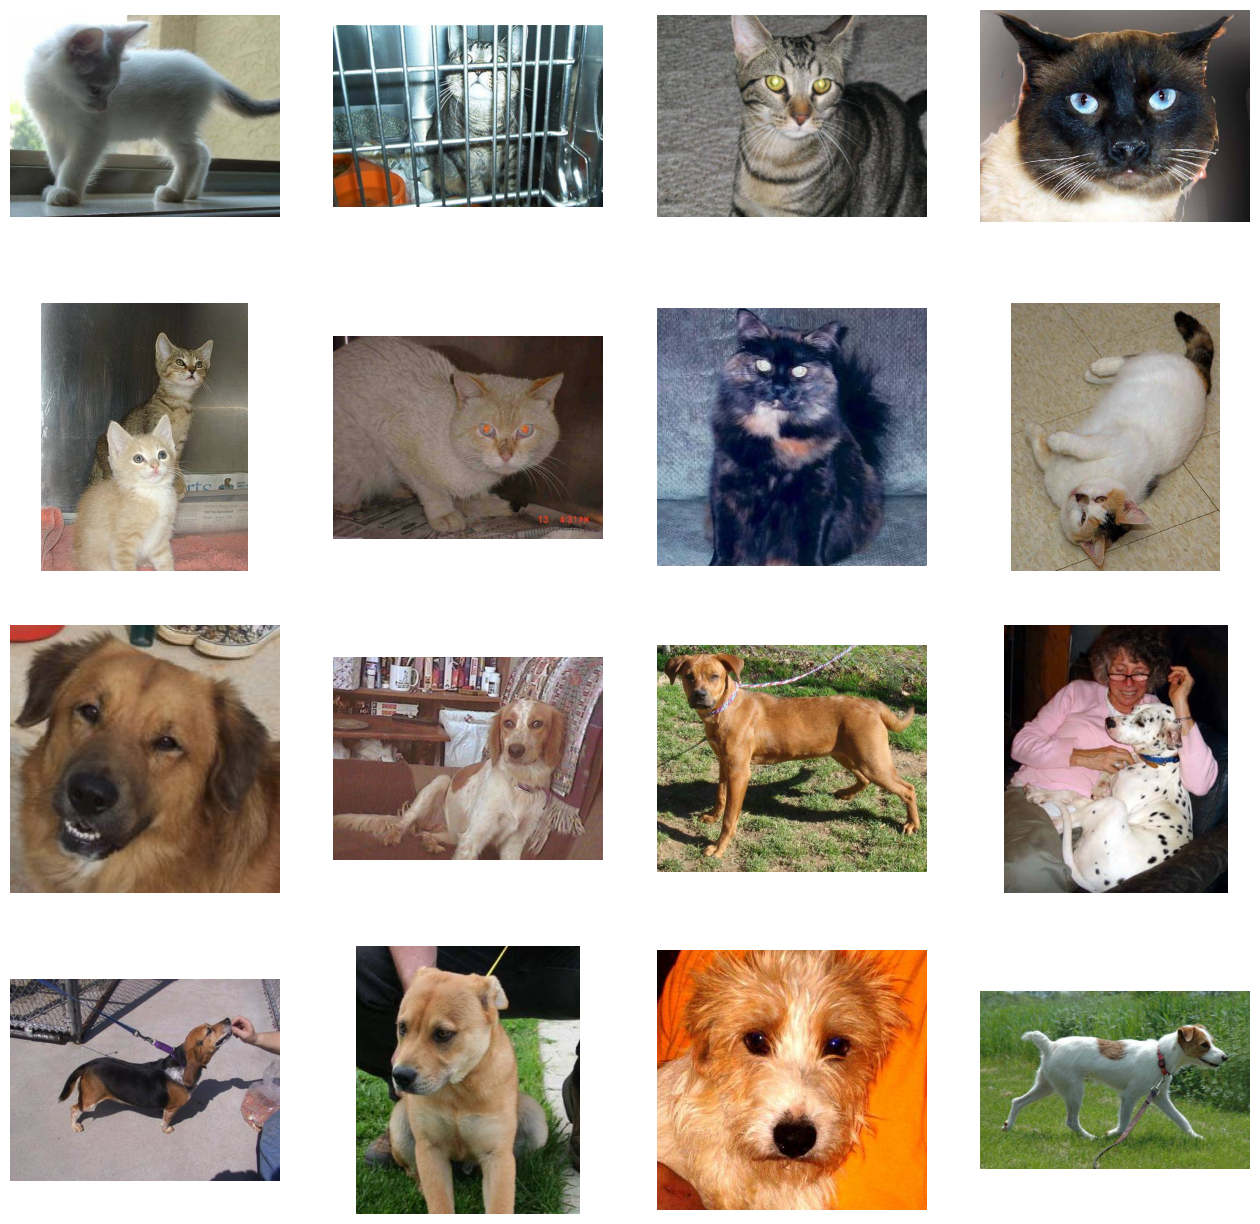

In [ ]:
# set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_cat_pix = [os.path.join(train_cats_dir, fname) for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
  # set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i+1)
  sp.axis('Off')

  img= mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  model = tf.keras.models.Sequential([
      # note the input shape is the desired size of the image 150x150 with 3 bytes color
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150,3)),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      # flatten the results to feed into a DNN
      tf.keras.layers.Flatten(),
      # 512 neuron hidden layers
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics = ['accuracy'])
  return model

In [ ]:
model.summary()

AttributeError: ignored

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

model_for_aug = create_model()

# all images will be rescaled by 1/.255
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


test_datagen  = ImageDataGenerator( rescale = 1./255)

#____________________________________________________________________
# Flow training images in bathces of 20 using train_datagen generator
#____________________________________________________________________

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    target_size=(150,150),
    class_mode='binary',)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(150,150))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
# constant for epochs
EPOCHS = 100

# create new model
model = create_model()

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=EPOCHS,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
    )

Epoch 1/100
100/100 - 17s - loss: 0.6940 - accuracy: 0.5010 - val_loss: 0.6912 - val_accuracy: 0.5000 - 17s/epoch - 171ms/step
Epoch 2/100
100/100 - 16s - loss: 0.6885 - accuracy: 0.5395 - val_loss: 0.6822 - val_accuracy: 0.5500 - 16s/epoch - 160ms/step
Epoch 3/100
100/100 - 15s - loss: 0.6817 - accuracy: 0.5670 - val_loss: 0.6620 - val_accuracy: 0.6230 - 15s/epoch - 154ms/step
Epoch 4/100
100/100 - 16s - loss: 0.6686 - accuracy: 0.5990 - val_loss: 0.6759 - val_accuracy: 0.5750 - 16s/epoch - 155ms/step
Epoch 5/100
100/100 - 15s - loss: 0.6629 - accuracy: 0.6035 - val_loss: 0.6325 - val_accuracy: 0.6530 - 15s/epoch - 154ms/step
Epoch 6/100
100/100 - 16s - loss: 0.6471 - accuracy: 0.6230 - val_loss: 0.6044 - val_accuracy: 0.6740 - 16s/epoch - 158ms/step
Epoch 7/100
100/100 - 15s - loss: 0.6367 - accuracy: 0.6355 - val_loss: 0.5899 - val_accuracy: 0.7020 - 15s/epoch - 154ms/step
Epoch 8/100
100/100 - 16s - loss: 0.6271 - accuracy: 0.6420 - val_loss: 0.5860 - val_accuracy: 0.6750 - 16s/epo

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and Validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training loss')
  plt.plot(epochs, val_loss, 'b', label='Validation loss')
  plt.title('Training and Validation loss')
  plt.legend()

  plt.show()


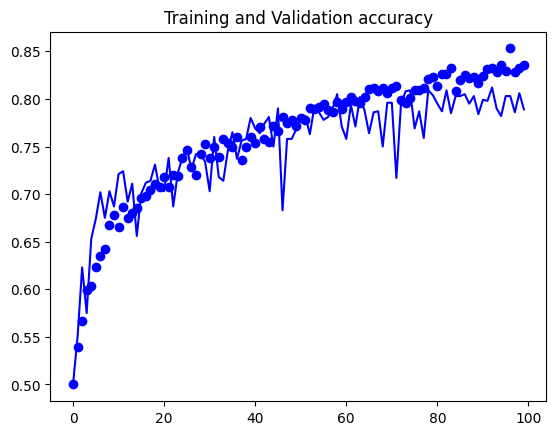

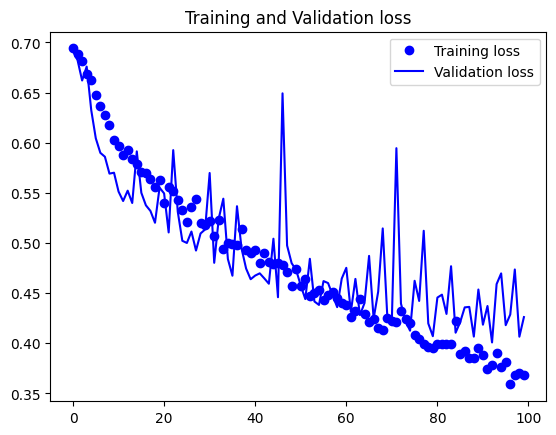

In [ ]:
# plot training result
plot_loss_acc(history)

In [ ]:
import numpy as np

from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150,150))

  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)

  print(classes[0])

  if classes[0]>0.5:
    print(fn + " adalah anjing")
  else:
    print(fn + " adalah kucing")

KeyboardInterrupt: ignored

1/1 [==============================] - 0s 140ms/step


<ipython-input-21-9ee232890ce2>:37: RuntimeWarning: invalid value encountered in divide
  x /= x.std()


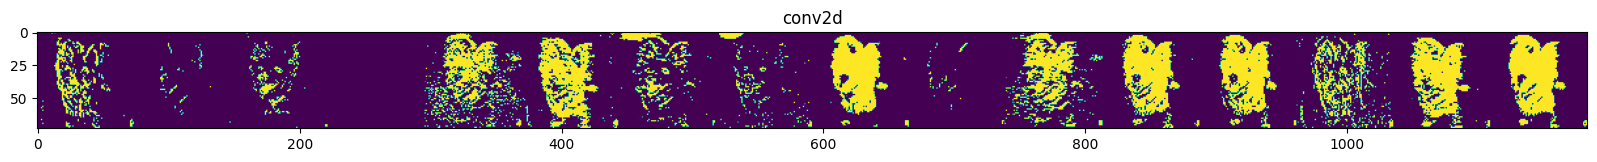

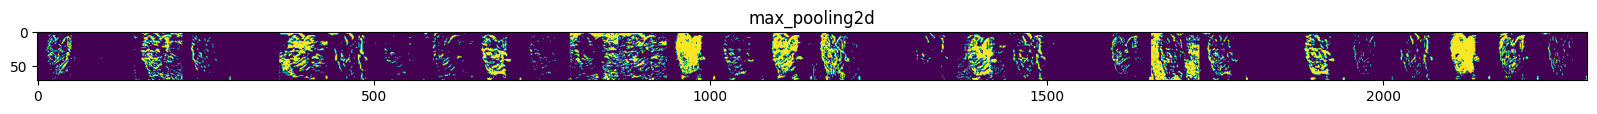

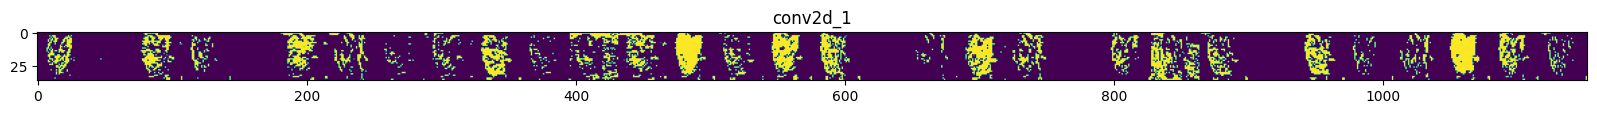

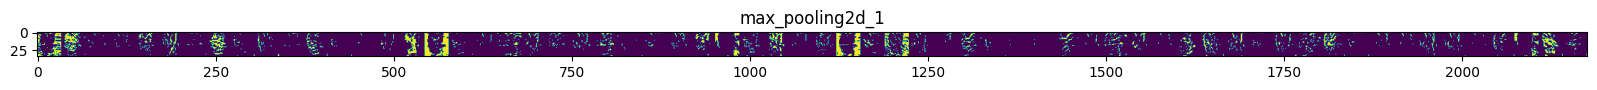

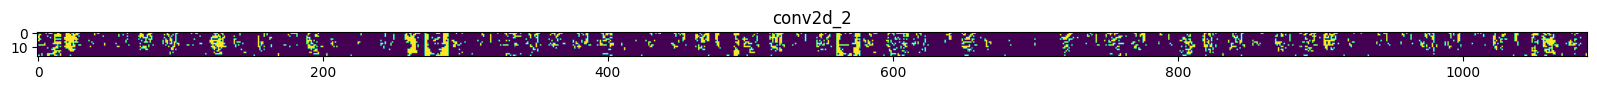

In [ ]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# mendefinisikan model baru yang akan mengambil image sebagai input, dan akan menjadi output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# menyiapkan random input image dari traingin set
cat_img_files = [os.path.join(train_cats_dir,f) for f in train_cat_fnames]
dog_img_files = [os.path.join(train_dogs_dir,f) for f in train_dog_fnames]
img_path = random.choice(cat_img_files + dog_img_files)
img = load_img(img_path, target_size=(150,150))
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

# scale by 1/255
x /= 255.0

successive_feature_maps = visualization_model.predict(x)

layer_names = [layer.name for layer in model.layers]

# display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape)==4:
    n_features = feature_map.shape[-1]
    size       = feature_map.shape[1]

    display_grid = np.zeros((size, size * n_features))

    for i in range(n_features):
      x  = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x *= 128
      x  = np.clip(x, 0, 255).astype('uint8')
      display_grid[:, i * size : (i+1) * size] = x

    scale = 20. / n_features
    plt.figure( figsize=(scale * n_features, scale))
    plt. title( layer_name)
    plt.grid( False)
    plt.imshow( display_grid, aspect='auto', cmap='viridis')

<Figure size 640x480 with 0 Axes>

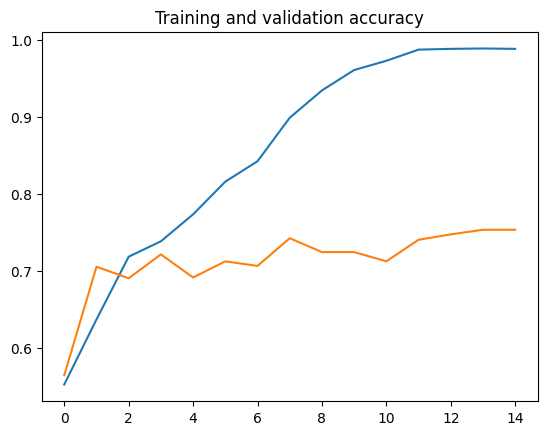

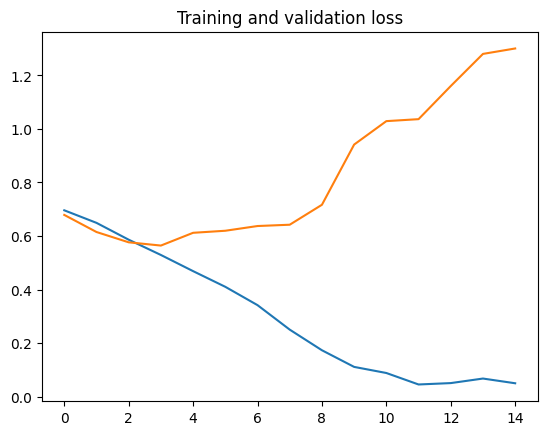

<Figure size 640x480 with 0 Axes>

In [ ]:
#evaluating accuracy and loss for the model

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------

acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs = range(len(acc))

#plot training and validation accuracy per epochs
plt.plot ( epochs, acc)
plt.plot ( epochs, val_acc)
plt.title ( 'Training and validation accuracy')
plt.figure()

#plot training and validation loss per epochs
plt.plot ( epochs, loss)
plt.plot ( epochs, val_loss)
plt.title ( 'Training and validation loss')
plt.figure()

